In [972]:
import warnings
warnings.filterwarnings('ignore')

In [973]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [974]:
churn_data=pd.read_csv("Churn data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [975]:
customer_data=pd.read_csv('customer_data.csv')
customer_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [976]:
inernet_data=pd.read_csv('Internet_data.csv')
inernet_data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [977]:
df1=churn_data.merge(customer_data,how='inner',on='customerID')
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [978]:
#Final merging of all the data into a single data frame
df=df1.merge(inernet_data,how='inner',on='customerID')

In [979]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [980]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [981]:
#dropping customer id
df.drop(['customerID'],1,inplace=True)

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [983]:
#Checnking the null values
df.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [984]:
def isfloat(x):
    try:
        
        return float(x)
    except:
        return None
    return None

In [985]:
df['TotalCharges']=df['TotalCharges'].apply(isfloat)


In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [987]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [988]:
#creating custom function to know  the unique key of each catergorical cpolumns

def unique_id(churn_data,cat_col):
    dat_frame={}
    for i in cat_col:
        ids=churn_data[i].unique()
        dat_frame[i]=ids
    return dat_frame

In [989]:
#separating out the Categorical columns and numerical columns 
categorical_col=[col for col in df.columns if df[col].dtype=='O']
numerical_col=[col for col in df.columns if df[col].dtype!='O']

In [990]:
dict_unq_id=unique_id(df,categorical_col)


In [991]:
categorical_col_uni_id_df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_unq_id.items() ]))

In [992]:
categorical_col_uni_id_df

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,Yes,Male,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes
2,NaN,Two year,NaN,Bank transfer (automatic),NaN,NaN,NaN,NaN,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,NaN,NaN,NaN,Credit card (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [993]:
def Value_counts_plots(data,inpt_cols):
     sns.countplot(x=data[inpt_cols])
     plt.show()

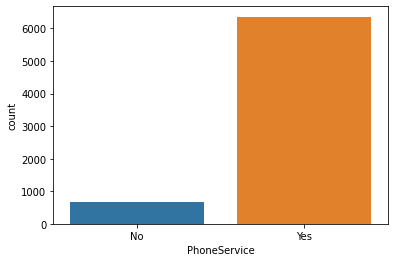

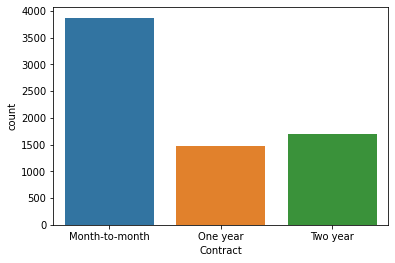

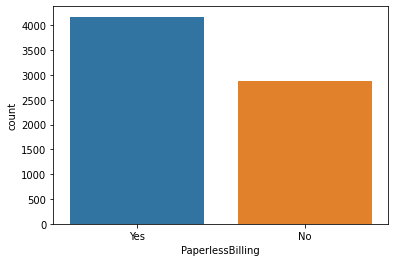

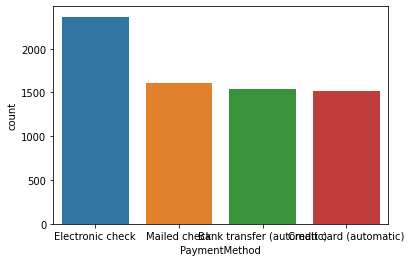

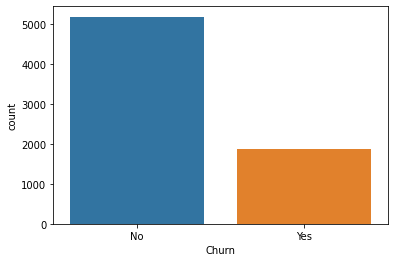

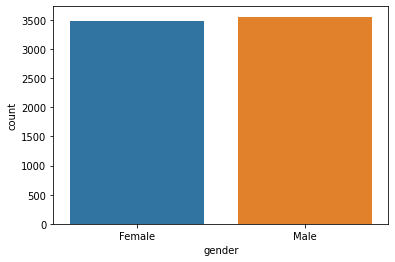

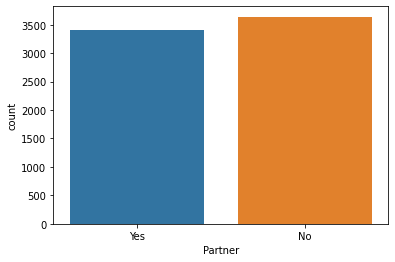

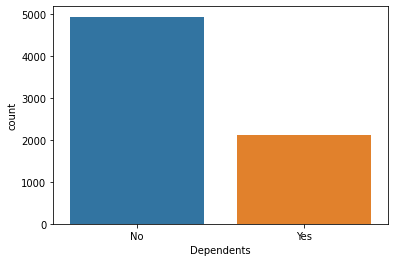

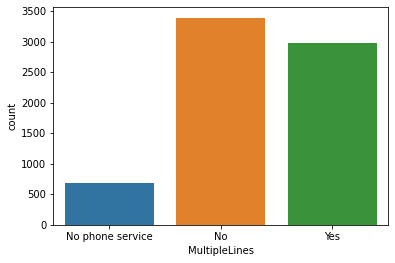

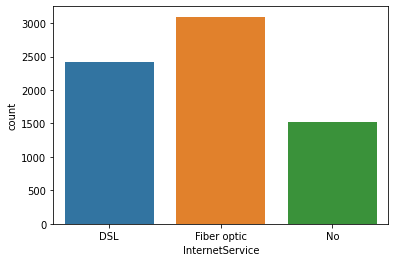

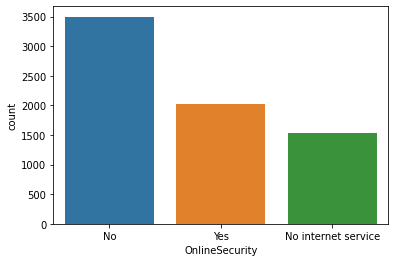

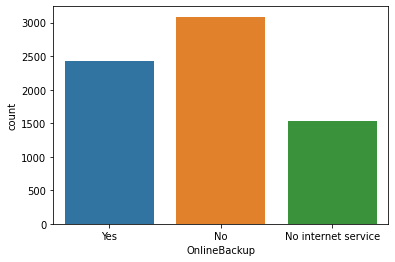

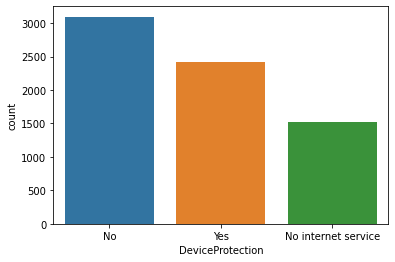

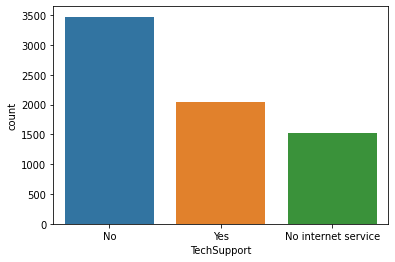

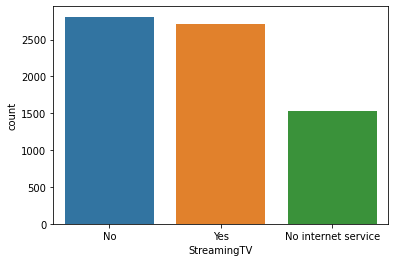

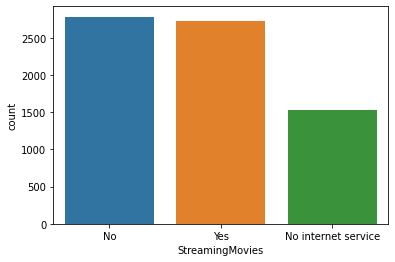

In [994]:
for i in categorical_col:
    Value_counts_plots(df,i)

In [995]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [996]:
def plot_num_cols(data,num_column):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.distplot(data[num_column])
    plt.subplot(1,2,2)
    sns.boxplot(data[num_column])
    plt.show()


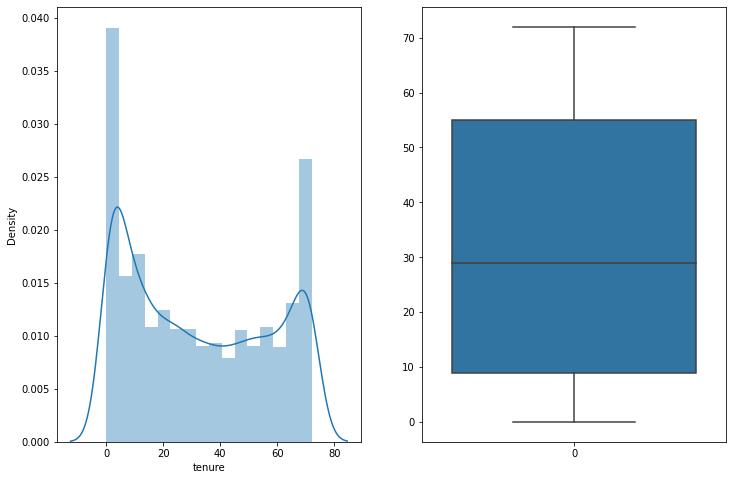

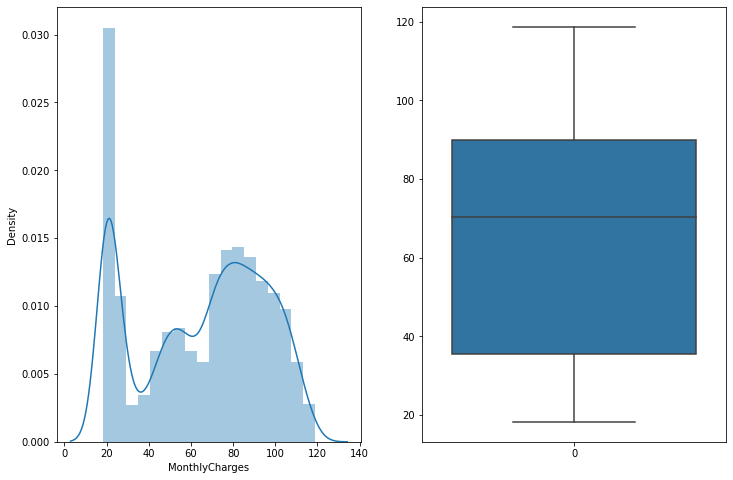

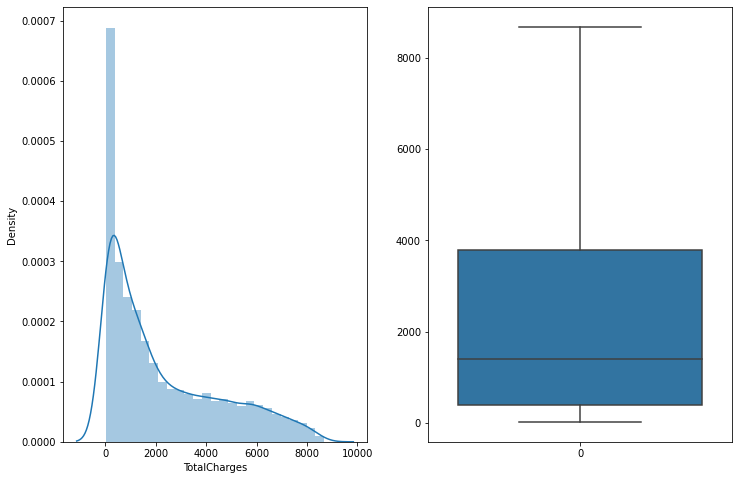

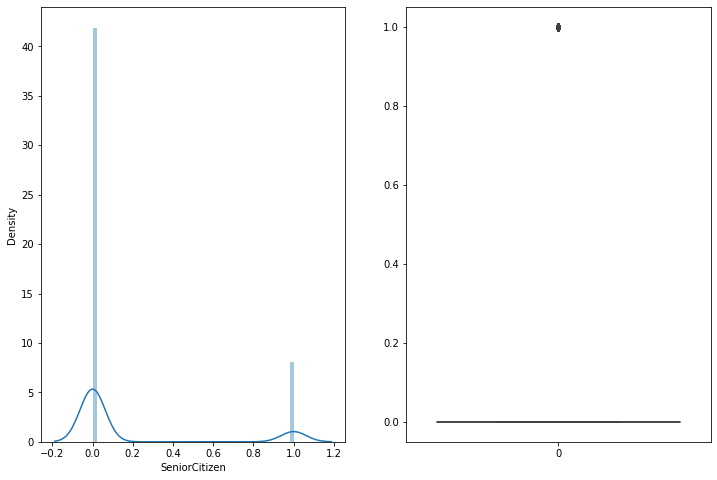

In [997]:
for i in numerical_col:
    plot_num_cols(df,i)

In [998]:
df.head(2)

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [999]:
from sklearn.model_selection import *

In [1000]:
#mapping encoding to the output variable
df['Churn']=df['Churn'].map({'Yes':1,'No':0})


In [1001]:
df.head(2)


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [1002]:
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [1003]:
churn_rate=len(df[df['Churn']==1])/len(df)*100
churn_rate

26.536987079369588

# We have 26.53% percent of data is churn rate 

df['PhoneService']=np.where(df['PhoneService']=='Yes',1,0)
df['Contract']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['PaperlessBilling']=np.where(df['PaperlessBilling']=='Yes',1,0)
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df['gender']=np.where(df['gender']=='Male',1,0)
df['Partner']=np.where(df['Partner']=='Yes',1,0)
df['Dependents']=np.where(df['Dependents']=='Yes',1,0)
df['MultipleLines']=df['MultipleLines'].map({'No phone service':-1, 'No':0, 'Yes':1})
df['InternetService']=df['InternetService'].map({'DSL':1, 'Fiber optic':2, 'No':0})
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':-1})
df['OnlineBackup']=df['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':-1})
df['DeviceProtection']=df['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':-1})
df['TechSupport']=df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':-1})
df['StreamingTV']=df['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':-1})
df['StreamingMovies']=df['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':-1})


In [1004]:
categorical_col_uni_id_df

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,Yes,Male,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes
2,NaN,Two year,NaN,Bank transfer (automatic),NaN,NaN,NaN,NaN,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,NaN,NaN,NaN,Credit card (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1005]:
x=['PaperlessBilling','PhoneService','Partner','Dependents']

def encoding_(col):
    return col.map({'Yes':1, 'No':0})


In [1006]:
df[x]=df[x].apply(encoding_)

In [1007]:
df.head()


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [1008]:
#creating dummy set dataset for categorical columns 
dummy_set=pd.get_dummies(df[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

In [1009]:
#concating the dummy data set into onriginal dataset 
df=pd.concat([dummy_set,df],axis=1)

In [1010]:
#dropping the original columns aftyer getting dummies
df.drop(['Contract','PaymentMethod','gender','InternetService'],1,inplace=True)

In [1011]:
df.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,tenure,PhoneService,...,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,No phone service,No,Yes,No,No,No,No
1,1,0,0,0,1,1,0,0,34,1,...,0,0,0,No,Yes,No,Yes,No,No,No
2,0,0,0,0,1,1,0,0,2,1,...,0,0,0,No,Yes,Yes,No,No,No,No
3,1,0,0,0,0,1,0,0,45,0,...,0,0,0,No phone service,Yes,No,Yes,Yes,No,No
4,0,0,0,1,0,0,1,0,2,1,...,0,0,0,No,No,No,No,No,No,No


In [1012]:
categorical_col_uni_id_df

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,Yes,Male,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes
2,NaN,Two year,NaN,Bank transfer (automatic),NaN,NaN,NaN,NaN,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,NaN,NaN,NaN,Credit card (automatic),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1013]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [1014]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
#creating dummy set for MultipleLines Columns 
ml=pd.get_dummies(df['MultipleLines'],prefix='MultipleLines')
ml.drop(['MultipleLines_No phone service'],1,inplace=True)
df=pd.concat([ml,df],axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os = os.drop(['OnlineSecurity_No internet service'], 1,inplace=True)
# Adding the results to the master dataframe
df = pd.concat([df,os], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
ob=pd.get_dummies(df['OnlineBackup'],prefix='OnlineBackup')
ob.drop(['OnlineBackup_No internet service'],1,inplace=True)
df=pd.concat([ob,df],axis=1)

#  Creating dummy variables for the variable DeviceProtection.
dp=pd.get_dummies(df['DeviceProtection'],prefix='DeviceProtection')
dp.drop(['DeviceProtection_No internet service'],1,inplace=True)
df=pd.concat([dp,df],axis=1)

#  Creating dummy variables for the variable  TechSupport
ts=pd.get_dummies(df['TechSupport'],prefix='TechSupport')
ts.drop(['TechSupport_No internet service'],1,inplace=True)

#  Creating dummy variables for the variable  StreamingTV
st=pd.get_dummies(df['StreamingTV'],prefix='StreamingTV')
st.drop(['StreamingTV_No internet service'],1,inplace=True)
df=pd.concat([st,df],axis=1)

sm=pd.get_dummies(df['StreamingMovies'],prefix='StreamingMovies')
sm.drop(['StreamingMovies_No internet service'],1,inplace=True)
df=pd.concat([sm,df],axis=1)


In [1015]:
col=[col for col in df.columns if df[col].isnull().sum()!=0]
col

['TotalCharges']

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [1016]:
df=df.dropna()

In [1017]:
col=[col for col in df.columns if df[col].isnull().sum()!=0]
col

[]

In [1018]:
df.head()

,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes,DeviceProtection_No,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_Yes,MultipleLines_No,MultipleLines_Yes,...,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,No phone service,No,Yes,No,No,No,No
1,1,0,1,0,0,1,1,0,1,0,...,0,0,0,No,Yes,No,Yes,No,No,No
2,1,0,1,0,1,0,0,1,1,0,...,0,0,0,No,Yes,Yes,No,No,No,No
3,1,0,1,0,0,1,1,0,0,0,...,0,0,0,No phone service,Yes,No,Yes,Yes,No,No
4,1,0,1,0,1,0,1,0,1,0,...,0,0,0,No,No,No,No,No,No,No


In [1019]:
df.drop(['MultipleLines',	'OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies'],1,inplace=True)

<AxesSubplot:>

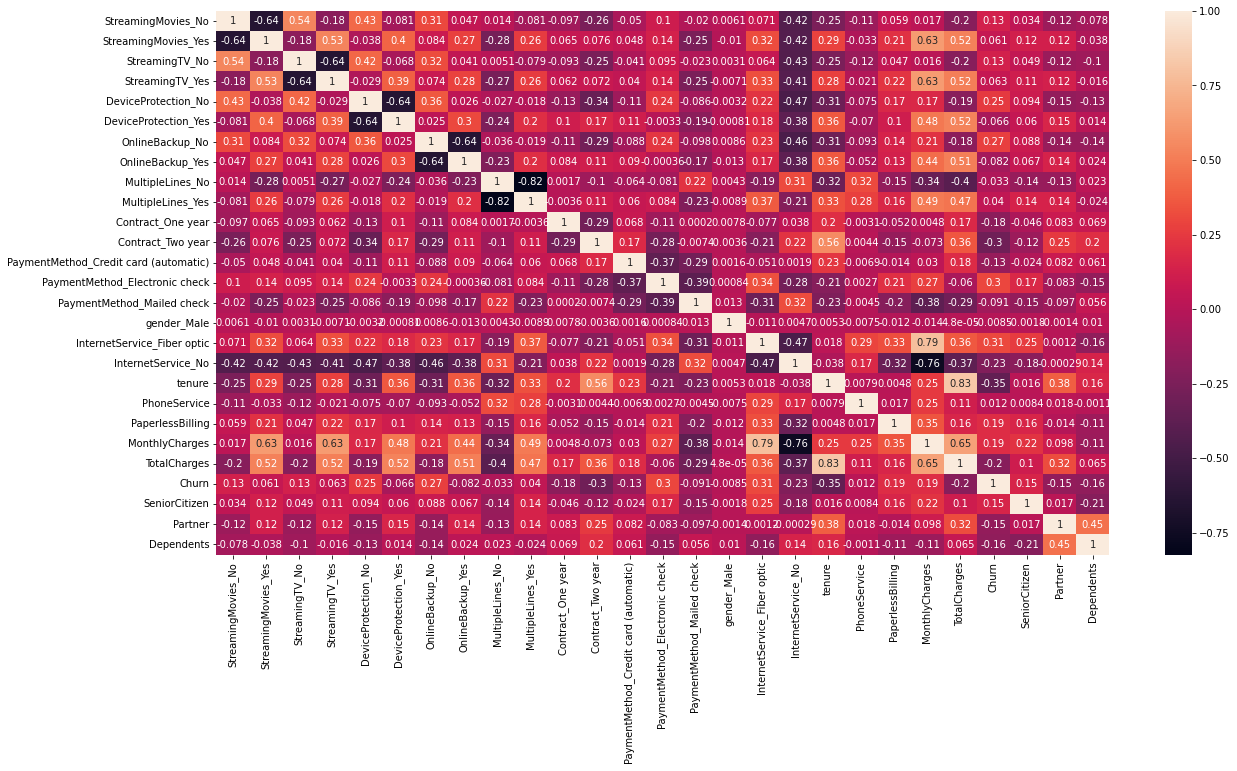

In [1020]:
cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

# Here from the above correlation we get information that -
1. Some dummy variable are highly related to each other 



In [1021]:
from sklearn.model_selection import  train_test_split

In [1022]:
x=df.drop(['Churn'],1)
y=df['Churn']

In [1023]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.30,random_state=40)

In [1024]:
x_train.columns

Index(['StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [1025]:
#Dropping highly Related columns from training and testing dataset
x_train.drop(['StreamingMovies_No','StreamingTV_No','DeviceProtection_No','OnlineBackup_No','MultipleLines_No'],1,inplace=True)
x_test.drop(['StreamingMovies_No','StreamingTV_No','DeviceProtection_No','OnlineBackup_No','MultipleLines_No'],1,inplace=True)

In [1026]:
x_train

,StreamingMovies_Yes,StreamingTV_Yes,DeviceProtection_Yes,OnlineBackup_Yes,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,InternetService_Fiber optic,InternetService_No,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents
983,1,0,0,0,1,0,0,0,1,0,...,1,0,1,1,1,86.60,86.60,0,0,0
6565,1,1,0,1,1,0,0,0,1,0,...,1,0,61,1,1,106.20,6375.20,0,1,0
2212,0,0,0,0,0,1,0,0,0,1,...,0,1,10,1,0,19.50,225.85,0,0,0
2526,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,19.40,19.40,0,0,0
2751,0,0,0,0,0,0,0,0,0,1,...,0,0,19,0,1,24.85,434.80,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0,0,0,0,0,0,0,0,1,0,...,1,0,41,1,1,74.25,3089.10,0,0,0
6532,0,0,0,0,0,1,0,0,0,0,...,0,1,18,1,0,20.35,369.60,1,0,0
3528,0,0,0,0,0,0,0,0,0,1,...,0,1,16,1,1,19.70,342.40,0,0,0
943,1,1,1,1,0,0,1,0,0,0,...,0,0,72,0,0,65.50,4919.70,0,1,0


In [1027]:
x_train

,StreamingMovies_Yes,StreamingTV_Yes,DeviceProtection_Yes,OnlineBackup_Yes,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,InternetService_Fiber optic,InternetService_No,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents
983,1,0,0,0,1,0,0,0,1,0,...,1,0,1,1,1,86.60,86.60,0,0,0
6565,1,1,0,1,1,0,0,0,1,0,...,1,0,61,1,1,106.20,6375.20,0,1,0
2212,0,0,0,0,0,1,0,0,0,1,...,0,1,10,1,0,19.50,225.85,0,0,0
2526,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,19.40,19.40,0,0,0
2751,0,0,0,0,0,0,0,0,0,1,...,0,0,19,0,1,24.85,434.80,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0,0,0,0,0,0,0,0,1,0,...,1,0,41,1,1,74.25,3089.10,0,0,0
6532,0,0,0,0,0,1,0,0,0,0,...,0,1,18,1,0,20.35,369.60,1,0,0
3528,0,0,0,0,0,0,0,0,0,1,...,0,1,16,1,1,19.70,342.40,0,0,0
943,1,1,1,1,0,0,1,0,0,0,...,0,0,72,0,0,65.50,4919.70,0,1,0


<AxesSubplot:>

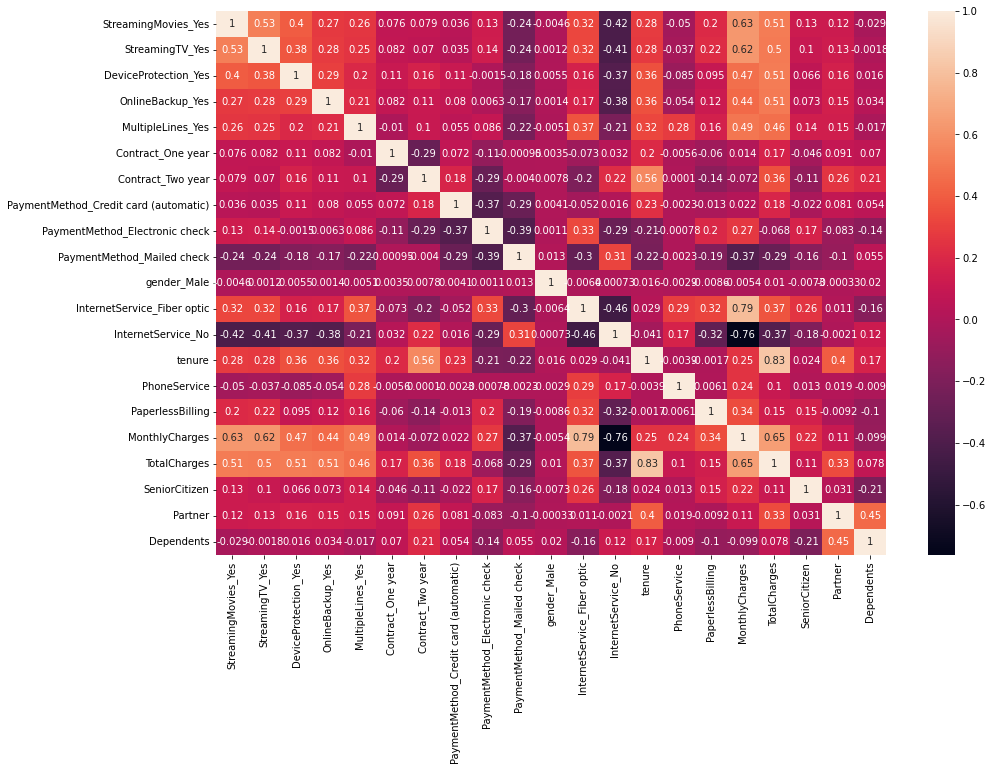

In [1028]:
#After dropping checking the correaltion values
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [1029]:
#Now building the Model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [1030]:
model= {'Logistics_Model':LogisticRegression(),'Random Forest':RandomForestClassifier(),'Gaussian Naive':GaussianNB(),'Xgboost':XGBClassifier()}

In [1031]:
from sklearn.metrics import recall_score,precision_score,roc_auc_score,roc_curve,accuracy_score,f1_score,confusion_matrix,classification_report

In [1032]:
#custom define fucntion to check the accuracy of  each model 

def model_selection(models,xtrain,ytrain,xtest,ytest):
    models.fit(xtrain,ytrain)
    y_train_pred=models.predict(xtrain)
    y_test_pred=models.predict(xtest)
    return accuracy_score(ytrain,y_train_pred),recall_score(ytrain,y_train_pred),precision_score(ytrain,y_train_pred),f1_score(ytrain,y_train_pred)
    #return accuracy_score(y_test_pred,ytest),recall_score(y_test_pred,ytest),precision_score(y_test_pred,ytest),f1_score(y_test_pred,ytest)



In [1033]:
#passing the arguments to predict the accuracy 
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_train=[]
for key,value in model.items():
        accu,recal,prec,f1=model_selection(value,x_train,y_train,x_test,y_test)
        accuracy_train.append(accu)
        recall_train.append(recal)
        precision_train.append(prec)
        f1_train.append(f1)

In [1034]:
accuracy_scores_data=pd.DataFrame({'Models':model.keys(),'Accuracy_score':accuracy_train,'Recall_score':recall_train,'Precision':precision_train,'F1_score':f1_train})

In [1035]:
accuracy_scores_data

,Models,Accuracy_score,Recall_score,Precision,F1_score
0,Logistics_Model,0.801707,0.505352,0.667677,0.575283
1,Random Forest,0.998781,0.998471,0.996947,0.997708
2,Gaussian Naive,0.733035,0.767584,0.498510,0.604455
3,Xgboost,0.936205,0.849388,0.904723,0.876183


# from the above data we can see that Random forest and Xgboost working good and giving good score on training data set

In [1036]:
#scaling by Standard Scaling 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=scale.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_test[['tenure','MonthlyCharges','TotalCharges']]=scale.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [1037]:
x_train.head()

,StreamingMovies_Yes,StreamingTV_Yes,DeviceProtection_Yes,OnlineBackup_Yes,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,InternetService_Fiber optic,InternetService_No,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents
983,1,0,0,0,1,0,0,0,1,0,...,1,0,-1.281139,1,1,0.726146,-0.970138,0,0,0
6565,1,1,0,1,1,0,0,0,1,0,...,1,0,1.170193,1,1,1.381503,1.809078,0,1,0
2212,0,0,0,0,0,1,0,0,0,1,...,0,1,-0.913439,1,0,-1.517446,-0.908597,0,0,0
2526,0,0,0,0,0,0,0,0,0,1,...,0,1,-1.281139,1,0,-1.520790,-0.999837,0,0,0
2751,0,0,0,0,0,0,0,0,0,1,...,0,0,-0.545739,0,1,-1.338561,-0.816253,0,1,1


In [1038]:
#checking the accuracy after scaling
#passing the arguments to predict the accuracy 
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_train=[]
for key,value in model.items():
        accu,recal,prec,f1=model_selection(value,x_train,y_train,x_test,y_test)
        accuracy_train.append(accu)
        recall_train.append(recal)
        precision_train.append(prec)
        f1_train.append(f1)




In [1039]:
accuracy_scores_data=pd.DataFrame({'Models':model.keys(),'Accuracy_score':accuracy_train,'Recall_score':recall_train,'Precision':precision_train,'F1_score':f1_train})

In [1040]:
accuracy_scores_data

,Models,Accuracy_score,Recall_score,Precision,F1_score
0,Logistics_Model,0.802722,0.530581,0.660324,0.588385
1,Random Forest,0.998781,0.997706,0.997706,0.997706
2,Gaussian Naive,0.732426,0.772171,0.497782,0.605334
3,Xgboost,0.936205,0.849388,0.904723,0.876183


# After scaling our accuarcy increase slightly

# Now using Variantion inflation factor check weather score is increasing or not

In [1041]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Columns_Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,Columns_Features,VIF
16,MonthlyCharges,16.91
17,TotalCharges,10.56
14,PhoneService,9.53
13,tenure,7.46
11,InternetService_Fiber optic,7.21
12,InternetService_No,6.42
6,Contract_Two year,3.22
0,StreamingMovies_Yes,3.02
1,StreamingTV_Yes,3.02
8,PaymentMethod_Electronic check,2.96


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 

In [1042]:
#Dropping the Monthlyu charges columns and storing it in new variable
x_train_vif=x_train.drop(['MonthlyCharges','PhoneService'],1)
x_test_vif=x_test.drop(['MonthlyCharges','PhoneService'],1)

In [1043]:
#checking the accuracy after scaling
#passing the arguments to predict the accuracy 
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_train=[]
for key,value in model.items():
        accu,recal,prec,f1=model_selection(value,x_train_vif,y_train,x_test_vif,y_test)
        accuracy_train.append(accu)
        recall_train.append(recal)
        precision_train.append(prec)
        f1_train.append(f1)

accuracy_scores_data=pd.DataFrame({'Models':model.keys(),'Accuracy_score':accuracy_train,'Recall_score':recall_train,'Precision':precision_train,'F1_score':f1_train})
accuracy_scores_data

,Models,Accuracy_score,Recall_score,Precision,F1_score
0,Logistics_Model,0.795002,0.509174,0.644724,0.568988
1,Random Forest,0.998781,0.998471,0.996947,0.997708
2,Gaussian Naive,0.736286,0.772171,0.502488,0.608800
3,Xgboost,0.929500,0.823394,0.902766,0.861255


# Not much affect on result too much

In [1044]:
from sklearn.feature_selection import RFE
logs=LogisticRegression()
rfe=RFE(logs, n_features_to_select=15)  
rfe.fit(x_train_vif,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [1045]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True])

In [1046]:
#cheking which column is required and its ranking
list(zip(x_train_vif.columns,rfe.support_,rfe.ranking_))

[('StreamingMovies_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('DeviceProtection_Yes', False, 3),
 ('OnlineBackup_Yes', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 4),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('tenure', True, 1),
 ('PaperlessBilling', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', True, 1)]

In [1047]:
col=x_train_vif.columns[rfe.support_]
col

Index(['StreamingMovies_Yes', 'StreamingTV_Yes', 'OnlineBackup_Yes',
       'MultipleLines_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'tenure', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Dependents'],
      dtype='object')

In [1048]:
x_train_vif.columns[~rfe.support_]

Index(['DeviceProtection_Yes', 'PaymentMethod_Mailed check', 'gender_Male',
       'Partner'],
      dtype='object')

In [1049]:
#checking the accuracy after scaling
#passing the arguments to predict the accuracy 
accuracy_train=[]
recall_train=[]
precision_train=[]
f1_train=[]
for key,value in model.items():
        accu,recal,prec,f1=model_selection(value,x_train_vif[col],y_train,x_test_vif[col],y_test)
        accuracy_train.append(accu)
        recall_train.append(recal)
        precision_train.append(prec)
        f1_train.append(f1)

accuracy_scores_data=pd.DataFrame({'Models':model.keys(),'Accuracy_score':accuracy_train,'Recall_score':recall_train,'Precision':precision_train,'F1_score':f1_train})
accuracy_scores_data

,Models,Accuracy_score,Recall_score,Precision,F1_score
0,Logistics_Model,0.793986,0.506116,0.642718,0.566296
1,Random Forest,0.996952,0.993884,0.994644,0.994264
2,Gaussian Naive,0.730597,0.773700,0.495593,0.604179
3,Xgboost,0.912231,0.791284,0.866834,0.827338


In [1050]:
#Plotting Roc curve for each model and check which model is performing well 
def roccurve(model2,xtrain,ytrain,model_name):
    model2.fit(xtrain,ytrain)
    y_train_predicted_prob=model2.predict_proba(xtrain)
    fpr1, tpr1, thresh1 = roc_curve(ytrain, y_train_predicted_prob[:,1], pos_label=1)
    plt.plot(fpr1,tpr1,label=model_name,marker='*',linestyle='dashed',color='Blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    

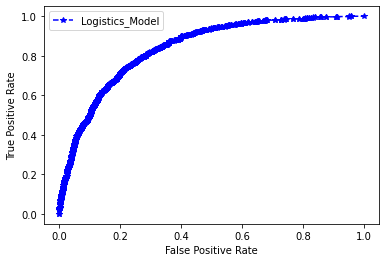

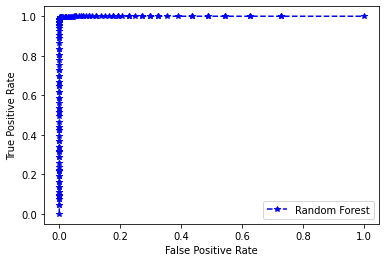

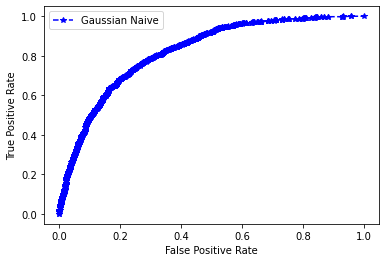

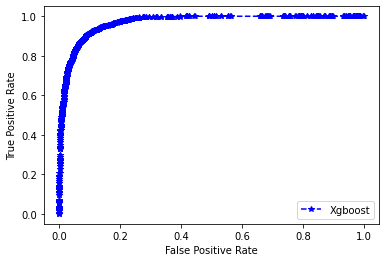

In [1051]:
for key,value in model.items():
    roccurve(value,x_train_vif[col],y_train,key)

In [1052]:
final_model=XGBClassifier()
final_model.fit(x_train_vif[col],y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1053]:
y_train_prob=final_model.predict_proba(x_train[col])

In [1054]:
y_train_prediction=final_model.predict(x_train[col])

In [1055]:
y_train_prob[:,1]

array([0.9607808 , 0.09037485, 0.0148583 , ..., 0.2322166 , 0.00244151,
       0.00422122], dtype=float32)

In [1056]:
roc_auc_score(y_train,y_train_prob[:,1])

0.9696997871004537

In [1057]:
fpr,tpr,thres=roc_curve(y_train,y_train_prob[:,1],pos_label=1)

In [1058]:
#Selection the optimum threshold value 
gmeans = np.sqrt(tpr * (1-fpr))


In [1059]:
pos=np.argmax(gmeans)

In [1060]:
thres[pos]

0.37798223

In [1061]:
print(f'For xgboost best threshold ={thres[pos]} and G-means = {gmeans[pos]} ')

For xgboost best threshold =0.3779822289943695 and G-means = 0.9089193774612943 


In [1066]:
confusion_matrix(y_train,y_train_prediction)

array([[3455,  159],
       [ 273, 1035]], dtype=int64)

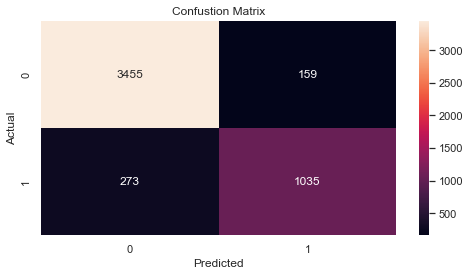

In [1074]:
sns.heatmap(confusion_matrix(y_train,y_train_prediction),annot=True,fmt='g')
plt.title('Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1082]:
def cutom_pred(x_data,y_data):
    y_pred_prob_2=final_model.predict_proba(x_data)
    return (y_pred_prob_2[:,1]>0.377982).astype(int)

In [1083]:
final_op=cutom_pred(x_train[col],y_train)

In [1084]:
final_op

array([1, 0, 0, ..., 0, 0, 0])

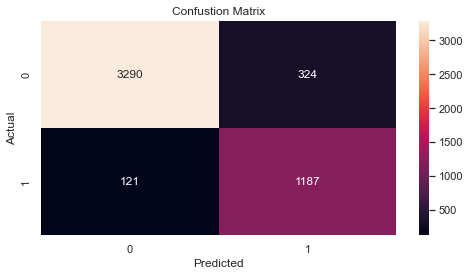

In [1085]:
sns.heatmap(confusion_matrix(y_train,final_op),annot=True,fmt='g')
plt.title('Confustion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final conclusion our model perform well with threshold value 0.344 , 
FN value also decrease that is much important for the for this project because if a customer is switching the other company  and our model is predicting it not moving in False Negative case. So this is too much important in this case

In [1088]:
import pickle
file=open('Xgboost.pkl','wb')
pickle.dump(final_model,file)